# Dynamic WSCC 9-bus System 

In [1]:
from villas.dataprocessing.dpsim import *
from villas.dataprocessing.plottools import *

### Read log files and list all column names

In [2]:
path = '../../dpsim/Logs/'
logName = 'WSCC-9bus_dyn_LeftVector'
logFilename = path + logName + '.csv'
print(logFilename)

ts_dpsim = read_timeseries_dpsim(logFilename)

../../dpsim/Logs/WSCC-9bus_dyn_LeftVector.csv
DPsim results real column names: []
DPsim results complex column names: ['node00000', 'node00001', 'node00002', 'node00003', 'node00004', 'node00005', 'node00006', 'node00007', 'node00008', 'node00009', 'node00010', 'node00011', 'node00012', 'node00013', 'node00014', 'node00015', 'node00016', 'node00017', 'node00018', 'node00019', 'node00020', 'node00021', 'node00022', 'node00023', 'node00024', 'node00025', 'node00026']
DPsim results variable number: 27
DPsim results length: 1000


### Phasors at first time step

In [3]:
phasors = get_node_voltage_phasors(ts_dpsim)
for node, phasor in phasors.items():
    print(node + ': ' + str(phasor['abs'].values[0]) + '<' + str(phasor['phase'].values[0]))

node00000: 14143.999308410936<4.857474017064399
node00001: 218644.34298226173<-4.1625089360313465
node00002: 222216.6905562262<-3.761444990718182
node00003: 229023.7305857707<-2.326823291000126
node00004: 17159.470564678595<-0.014698951338933326
node00005: 18448.557331298973<9.668742932989906
node00006: 229396.27925460105<3.9473108396056653
node00007: 230944.16050474215<2.0813456905905507
node00008: 225188.6564539684<0.8091677663891708
node00009: 17958.442476259694<2.2268969871352695
node00010: 6364.464641682676<131.80216963760213
node00011: 19871.80075683379<19.629700584806198
node00012: 9316.87961456737<171.56700830642123
node00013: 15228.078745852215<12.71192065821014
node00014: 6615.021225093159<160.52280847819213
node00015: 219638.3218985305<-4.446654028808249
node00016: 223465.55789256407<-4.020922078340548
node00017: 223011.06087044405<4.281162467856561
node00018: 227898.78105889927<4.037419858044602
node00019: 230283.06447872412<2.2323417562476084
node00020: 225522.56471753452<

### Phasors at last time step

In [4]:
for node, phasor in phasors.items():
    print(node + ': ' + str(phasor['abs'].values[-1]) + '<' + str(phasor['phase'].values[-1]))

node00000: 14144.39099944317<4.827256053704967
node00001: 218649.97108778314<-4.182724526631432
node00002: 222221.9337839593<-3.782342633832622
node00003: 229013.03362878854<-2.3440867547179547
node00004: 17159.692125251604<-0.02851596449151824
node00005: 18448.95546474946<9.641383338016961
node00006: 229386.74505500292<3.9217873880648275
node00007: 230938.38072713665<2.0540053743427733
node00008: 225193.01031610987<0.7826720895899364
node00009: 17958.4481204462<2.21666251893245
node00010: 6368.021429295366<131.84092757311063
node00011: 19871.800343079234<19.600065439381318
node00012: 9315.047864077564<171.53769729844976
node00013: 15228.087668450067<12.674398353349577
node00014: 6610.160998864173<160.47117104292832
node00015: 219645.23283083018<-4.466762708257043
node00016: 223473.2487158096<-4.04160751810923
node00017: 223005.3727576152<4.255713961920914
node00018: 227888.83321866058<4.011903287583163
node00019: 230277.7100534947<2.205024788537542
node00020: 225522.12571223816<2.3135

### Phasors at last time step in per unit

In [5]:
nominal_voltages = {'node00000': 13800, 'node00001': 230000, 'node00002': 230000, 
                    'node00003': 230000, 'node00004': 16500, 'node00005': 18000, 
                    'node00006': 230000, 'node00007': 230000, 'node00008': 230000} 
for node, nom_voltage in nominal_voltages.items():
    print(node + ': ' + str(phasors[node]['abs'].values[0] / nom_voltage) + '<' + str(phasors[node]['phase'].values[0]))

node00000: 1.0249274861167346<4.857474017064399
node00001: 0.9506275781837467<-4.1625089360313465
node00002: 0.9661595241575053<-3.761444990718182
node00003: 0.9957553503729162<-2.326823291000126
node00004: 1.039967913010824<-0.014698951338933326
node00005: 1.0249198517388318<9.668742932989906
node00006: 0.9973751271939176<3.9473108396056653
node00007: 1.004105045672792<2.0813456905905507
node00008: 0.9790811150172539<0.8091677663891708


### Plot node phase
The phase at node00007 is not initialized properly since the CIM load flow data is not accurate. Therefore, the steady-state initialization implemented in the MNA solver is executed first so that the initial phase at t=0 is already very close to the correct one.
Using PI-lines with parallel impedances to ground not only during the initialization but also the simulation or more accurate CIM load flow results would probably further improve the results because the values around node00007 have still not converged completely.

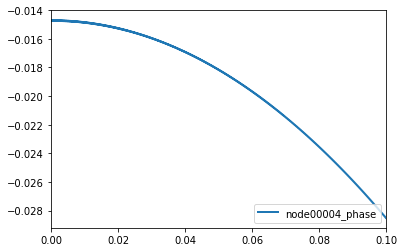

In [6]:
plot_timeseries(1, phasors['node00004']['phase'])

### Plot node voltages

(210000, 240000)

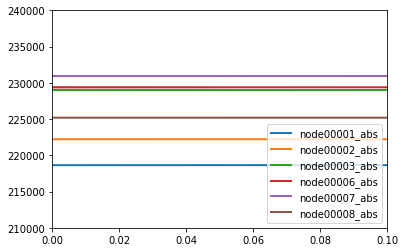

In [7]:
plot_timeseries(2, phasors['node00001']['abs'])
plot_timeseries(2, phasors['node00002']['abs'])
plot_timeseries(2, phasors['node00003']['abs'])
plot_timeseries(2, phasors['node00006']['abs'])
plot_timeseries(2, phasors['node00007']['abs'])
plot_timeseries(2, phasors['node00008']['abs'])
plt.gca().axes.set_ylim([210000,240000])

The results for node00001 are very good.

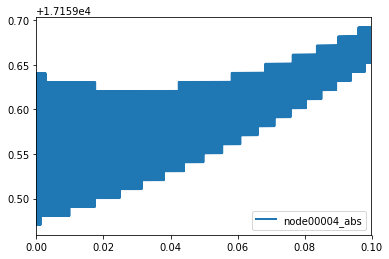

In [8]:
plot_timeseries(2, phasors['node00004']['abs'])